In [1]:
%store -r data_cat

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import seaborn as sns

## Preguntas Adicionales

### Correlación de datos

In [4]:
data_cat.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'state', 'lat',
       'lon', 'geometry', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'trending_date', 'publish_time', 'views',
       'likes', 'dislikes', 'comment_count', 'trending_count', 'kind', 'etag',
       'snippet.channelId', 'snippet.title', 'snippet.assignable'],
      dtype='object')

In [5]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16809 entries, 0 to 16808
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                16809 non-null  object             
 1   title                   16809 non-null  object             
 2   channel_title           16809 non-null  object             
 3   category_id             16809 non-null  Int64              
 4   state                   16809 non-null  object             
 5   lat                     16809 non-null  float64            
 6   lon                     16809 non-null  float64            
 7   geometry                16809 non-null  object             
 8   comments_disabled       16809 non-null  bool               
 9   ratings_disabled        16809 non-null  bool               
 10  video_error_or_removed  16809 non-null  bool               
 11  trending_date           16809 non-null  d

In [6]:
#omitiremos todos aquellos que no sean numéricos, de tiempo, o categóricos
#'state' a categórico?
data_reg = data_cat[[ 'trending_date', 'publish_time',
      'views', 'likes', 'dislikes', 'comment_count', 'trending_count',
       'snippet.title']]
data_reg

,trending_date,publish_time,views,likes,dislikes,comment_count,trending_count,snippet.title
0,2018-06-14,2018-06-12 05:44:19+00:00,1014376.00,5974.0,1414.00,1132.000,2,Entertainment
1,2018-01-12,2018-01-07 16:00:29+00:00,979069.40,8017.0,1434.55,1593.500,2,News & Politics
2,2018-04-25,2018-04-22 06:30:00+00:00,432700.00,2456.0,439.00,227.000,3,Entertainment
3,2018-02-28,2018-02-26 07:06:20+00:00,454944.00,1447.0,145.00,134.000,2,Entertainment
4,2017-12-12,2017-12-11 02:30:23+00:00,29607.00,0.0,0.00,0.000,1,Education
...,...,...,...,...,...,...,...,...
16804,2018-02-15,2018-02-15 03:38:56+00:00,17791.75,334.0,27.00,0.125,1,Howto & Style
16805,2018-06-01,2018-05-31 13:08:26+00:00,97600.00,924.0,77.00,125.000,2,Entertainment
16806,2018-01-31,2018-01-28 17:59:20+00:00,58563.00,256.0,45.00,30.000,3,Entertainment
16807,2018-04-18,2018-04-16 08:03:55+00:00,153387.00,8839.0,268.00,1529.000,2,Comedy


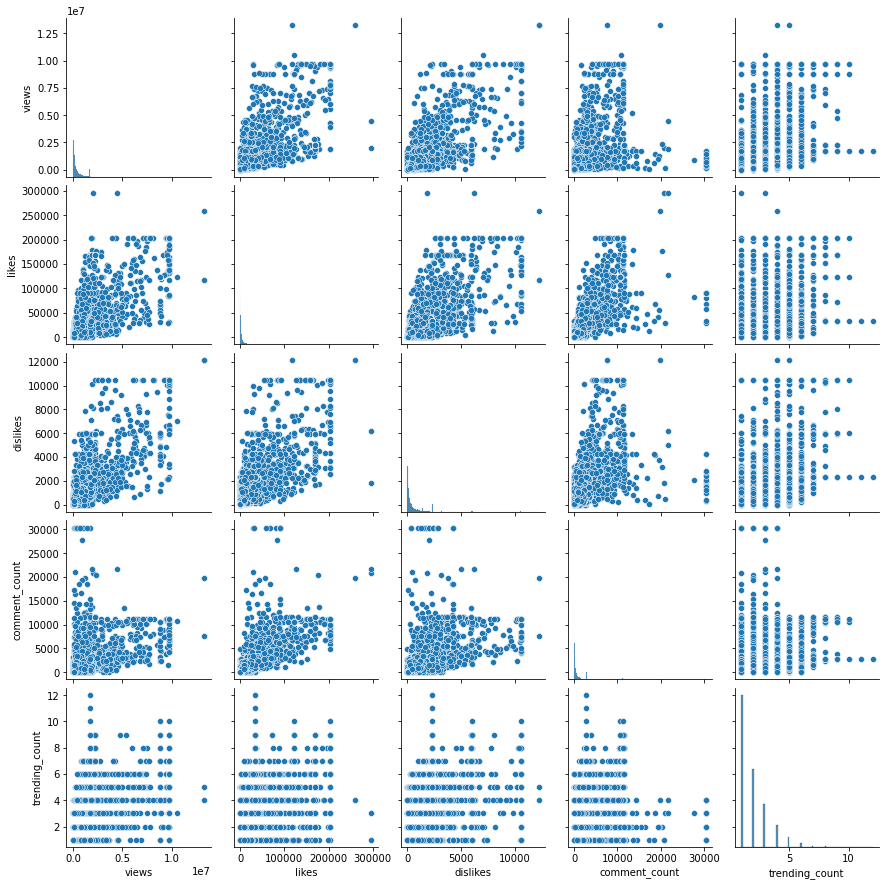

In [7]:
data_reg_pplot = sns.pairplot(data_reg)
data_reg_pplot

In [8]:
data_reg_pplot.figure.savefig('../graphs/pairplot.png')

<AxesSubplot:>

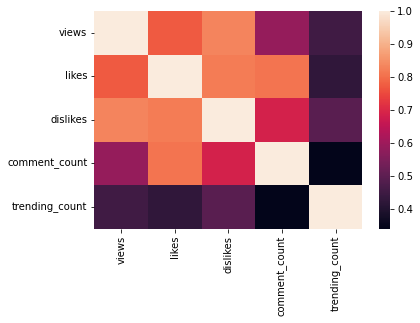

In [9]:
data_reg_hmap = sns.heatmap(data_reg.corr())
data_reg_hmap

In [10]:
data_reg_hmap.figure.savefig('../graphs/heatmap-correlation.png')

#### ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?

##### Likes

In [11]:
X = data_cat[['dislikes', 'views', 'comment_count','trending_count']]
y = data_cat['likes']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train,y_train)

LinearRegression()

In [15]:
lm_pred=lm.predict(X_test)

In [16]:
lm_pred

array([ 1.44673380e+05,  1.72454895e+04, -1.36322838e+03, ...,
        3.15134428e+04, -3.71023028e+02, -1.20883919e+02])

In [17]:
print(lm.score(X_test, y_test))

0.8112233713405121


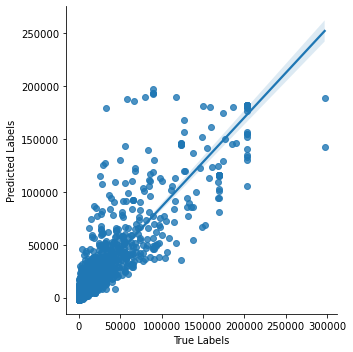

In [18]:
labels = {'True Labels': y_test, 'Predicted Labels': lm_pred}
df_lm = pd.DataFrame(data = labels)
fig = sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_lm)
fig.savefig('../graphs/RegresionLinealLikes.png')

In [19]:
slope = lm.coef_  
intercept = lm.intercept_ 

In [20]:
print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [6.15298012e+00 5.39006610e-03 5.88120604e+00 1.95761351e+02]
El término independiente de la recta 'w0' es:  -2336.458890427075


In [21]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
dislikes,6.152980
views,0.005390
comment_count,5.881206
trending_count,195.761351


##### Views

In [22]:
X = data_cat[['dislikes', 'likes', 'comment_count','trending_count']]
y = data_cat['views']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
lm_pred=lm.predict(X_test)

In [27]:
lm_pred

array([4535634.45274057,  809489.68213023,  116450.34567499, ...,
       1144513.22208787,  176229.09261162,  147916.25010025])

In [28]:
print(lm.score(X_test, y_test))

0.7488943172753925


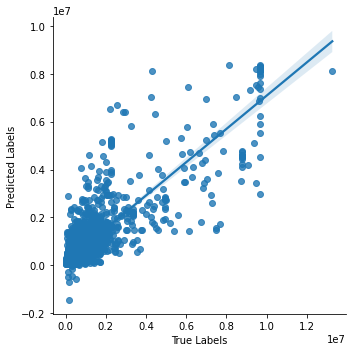

In [29]:
labels = {'True Labels': y_test, 'Predicted Labels': lm_pred}
df_lm = pd.DataFrame(data = labels)
fig = sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_lm)
fig.savefig('../graphs/RegresionLinealViews.png')

In [30]:
slope = lm.coef_  
intercept = lm.intercept_ 

In [31]:
print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [ 5.53683563e+02  1.45671383e+01 -7.26394007e+01  3.66125010e+04]
El término independiente de la recta 'w0' es:  42680.95546843944


In [32]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
dislikes,553.683563
likes,14.567138
comment_count,-72.639401
trending_count,36612.500986


##### Dislikes

In [33]:
X = data_cat[['views', 'likes', 'comment_count','trending_count']]
y = data_cat['dislikes']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
lm_pred=lm.predict(X_test)

In [38]:
lm_pred

array([7547.15160802,  360.38053651,   72.74650072, ..., 1544.95235337,
        135.50140406,  143.948349  ])

In [39]:
print(lm.score(X_test, y_test))

0.7803808712455322


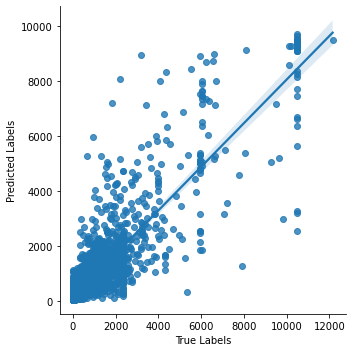

In [40]:
labels = {'True Labels': y_test, 'Predicted Labels': lm_pred}
df_lm = pd.DataFrame(data = labels)
fig = sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_lm)
fig.savefig('../graphs/RegresionLinealDislikes.png')

In [41]:
slope = lm.coef_  
intercept = lm.intercept_ 

In [42]:
print("Las pendientes 'w1' del modelo son: ", slope)
print("El término independiente de la recta 'w0' es: ", intercept)

Las pendientes 'w1' del modelo son:  [5.06689198e-04 1.52175830e-02 7.82858647e-02 9.08276901e+01]
El término independiente de la recta 'w0' es:  -54.9921855969875


In [43]:
coef_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coef_df

,Coeficiente
views,0.000507
likes,0.015218
comment_count,0.078286
trending_count,90.827690


#### ¿Los videos en tendencia son los que mayor cantidad de comentarios positivos reciben?

Con el dataset presente, no es posible saber que tipo de comentario reciben los videos en tendencia, es por eso que la pregunta no tiene respuesta.